In [80]:
# importare tutte le librerie necessarie
import pandas as pd
import numpy as np
import datetime as dt
from tabulate import tabulate
import matplotlib.pyplot as plt
import seaborn as sns
import os

#Processing libraries
from sklearn.preprocessing import StandardScaler,MinMaxScaler

# Model libraries
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, ExtraTreesClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB

# Testing libraries
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, learning_curve
from sklearn.metrics import accuracy_score, log_loss, confusion_matrix, classification_report, roc_curve, auc

# Cambio della cartella attuale nella cartella in cui si trova il file .py
path_file = os.path.abspath(os.getcwd())
print(path_file)
os.chdir(path_file)

path_cartella = r"\archive\csvs_per_year\csvs_per_year"

path = r".\\DataSet\\"
#path = path_file + path_cartella

c:\Users\chiar\OneDrive\Desktop\Progetto2DataScience\DataScience2Project


In [81]:
allMadrid = pd.read_csv(path+"out.csv")
#allMadrid = pd.read_csv(path+"\madrid_2008.csv")
allMadrid.head()

,date,BEN,CO,EBE,NMHC,NO,NO_2,O_3,PM10,PM25,SO_2,TCH,TOL,station
0,2008-06-01 01:00:00,NaN,0.47,NaN,NaN,11.820078,83.089996,16.990000,16.889999,10.4,8.98,NaN,NaN,28079001
1,2008-06-01 01:00:00,NaN,0.59,NaN,NaN,11.820078,94.820000,17.469999,19.040001,NaN,5.85,NaN,NaN,28079003
2,2008-06-01 01:00:00,NaN,0.55,NaN,NaN,11.820078,75.919998,13.470000,20.270000,NaN,6.95,NaN,NaN,28079004
3,2008-06-01 01:00:00,NaN,0.36,NaN,NaN,11.820078,61.029999,23.110001,10.850000,NaN,5.96,NaN,NaN,28079039
4,2008-06-01 01:00:00,1.68,0.80,1.7,0.3,11.820078,105.199997,12.120000,37.160000,21.9,10.92,1.53,6.67,28079006


In [82]:
#allMadrid = allMadrid.drop(['date','BEN', 'CO', 'EBE', 'NMHC', 'NO', 'NO_2', 'O_3', 'SO_2', 'TCH', 'TOL', 'PM25', 'station'], axis=1)
allMadrid = allMadrid.drop(['date','BEN', 'CO', 'EBE', 'NMHC', 'O_3', 'TCH', 'TOL', 'station'], axis=1)
#allMadrid = allMadrid.drop(['date','BEN', 'CO', 'EBE', 'MXY', 'NMHC', 'NOx', 'NO_2', 'OXY','O_3', 'PXY','SO_2', 'PM25', 'TCH', 'TOL', 'station'], axis=1)
#allMadrid = allMadrid.dropna()

allMadrid.head()


,NO,NO_2,PM10,PM25,SO_2
0,11.820078,83.089996,16.889999,10.4,8.98
1,11.820078,94.820000,19.040001,NaN,5.85
2,11.820078,75.919998,20.270000,NaN,6.95
3,11.820078,61.029999,10.850000,NaN,5.96
4,11.820078,105.199997,37.160000,21.9,10.92


In [83]:
allMadrid = allMadrid.fillna(0)
allMadrid = allMadrid.astype(int)
allMadrid.head()

,NO,NO_2,PM10,PM25,SO_2
0,11,83,16,10,8
1,11,94,19,0,5
2,11,75,20,0,6
3,11,61,10,0,5
4,11,105,37,21,10


In [84]:
#checking NaN values
allMadrid.replace(0, np.nan, inplace=True)
allMadrid.isnull().sum()

NO         6981
NO_2      10602
PM10     904322
PM25    1633483
SO_2    1023120
dtype: int64

In [102]:
allMadrid["PM10"].value_counts()

9.0      560892
7.0      549576
3.0      546678
1.0      475605
4.0      441782
          ...  
255.0         3
304.0         3
306.0         2
251.0         1
346.0         1
Name: PM10, Length: 85, dtype: int64

In [103]:
count = allMadrid["PM10"].value_counts().loc[lambda x : x <= 1000]

In [105]:
print(allMadrid)

           NO  NO_2   PM10  PM25  SO_2
0        11.0  83.0   16.0  10.0   8.0
1        11.0  68.0   16.0   9.0   8.0
2        11.0  65.0   16.0  12.0   6.0
3        11.0  47.0   16.0   NaN   4.0
4        11.0  57.0   16.0   9.0   7.0
...       ...   ...    ...   ...   ...
5652610   1.0   8.0  212.0   NaN   2.0
5652611  29.0  33.0  212.0  60.0   2.0
5652612   1.0  12.0  212.0   NaN   NaN
5652613   6.0  13.0  251.0   NaN   2.0
5652614  16.0  50.0  346.0  73.0   NaN

[5652615 rows x 5 columns]


In [107]:
#allMadrid = allMadrid.drop(allMadrid["PM10"].value_counts().loc[lambda x : x <= 1000].index, inplace = True)
v = allMadrid["PM10"].value_counts()
allMadrid[allMadrid["PM10"].isin(v.index[v.gt(1000)])]

#allMadrid.head()

,NO,NO_2,PM10,PM25,SO_2
0,11.0,83.0,16.0,10.0,8.0
1,11.0,68.0,16.0,9.0,8.0
2,11.0,65.0,16.0,12.0,6.0
3,11.0,47.0,16.0,NaN,4.0
4,11.0,57.0,16.0,9.0,7.0
...,...,...,...,...,...
5651246,1.0,7.0,76.0,NaN,NaN
5651247,1.0,25.0,76.0,NaN,NaN
5651248,4.0,13.0,76.0,NaN,7.0
5651249,4.0,15.0,76.0,NaN,6.0


In [4]:
#cerco i campi NaN in PM10 e li sostituisco con la media dei valori noti
#trovo il valor medio
for col in allMadrid.columns:
    if allMadrid[col].dtype != object:
        allMadrid[col]=allMadrid[col].fillna(allMadrid[col].mean())

#print(allMadrid['PM10'])

In [89]:
# Faccio un cambio di formato sul campo data passando da stringa a data
allMadrid['date'] = pd.to_datetime(allMadrid['date'], format='%Y/%m/%d %H:%M:%S')
#prendo la data solo in formato AAAA-MM-GG
#allMadrid['date'] = pd.to_datetime(allMadrid['date'].dt.strftime('%Y-%m-%d'))
print(allMadrid['date'])


0         2008-06-01 01:00:00
4         2008-06-01 01:00:00
8         2008-06-01 01:00:00
19        2008-06-01 01:00:00
21        2008-06-01 01:00:00
                  ...        
2190874   2018-02-01 00:00:00
2190877   2018-02-01 00:00:00
2190878   2018-02-01 00:00:00
2190880   2018-02-01 00:00:00
2190883   2018-02-01 00:00:00
Name: date, Length: 551781, dtype: datetime64[ns]


In [5]:
#raggruppo per station
allMadrid = allMadrid.groupby(['station','date']).mean()
print(allMadrid)

                                   BEN    CO       EBE      NMHC         NO  \
station  date                                                                 
28079001 2008-01-01 01:00:00  0.744943  1.85  0.817488  0.195187  11.820078   
         2008-01-01 02:00:00  0.744943  2.39  0.817488  0.195187  11.820078   
         2008-01-01 03:00:00  0.744943  1.30  0.817488  0.195187  11.820078   
         2008-01-01 04:00:00  0.744943  1.00  0.817488  0.195187  11.820078   
         2008-01-01 05:00:00  0.744943  1.11  0.817488  0.195187  11.820078   
...                                ...   ...       ...       ...        ...   
28079099 2010-12-31 20:00:00  1.140000  0.61  0.850000  0.210000  11.820078   
         2010-12-31 21:00:00  1.330000  0.81  0.920000  0.240000  11.820078   
         2010-12-31 22:00:00  2.070000  0.70  1.300000  0.260000  11.820078   
         2010-12-31 23:00:00  1.490000  0.62  1.140000  0.260000  11.820078   
         2011-01-01 00:00:00  1.110000  0.48  0.8600

In [12]:
allMadrid = pd.get_dummies(allMadrid)
allMadrid.head()

,PM10
0,16.889999
1,19.040001
2,20.270000
3,10.850000
4,37.160000


CLASSIFICAZIONE

In [13]:
condition_list = [(allMadrid['PM10'] <= 30), (allMadrid['PM10'] > 30)]

choicelist = [0,1] 

allMadrid['Livello'] = np.select(condition_list, choicelist, default='Non Specificato')

allMadrid['Livello'].value_counts() 

0    151094
1     69085
Name: Livello, dtype: int64

In [8]:
allMadrid.info()

prova = allMadrid[allMadrid['PM10'] > 50]

print(prova)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1286616 entries, 0 to 2190887
Data columns (total 2 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   PM10     1286616 non-null  float64
 1   Livello  1286616 non-null  object 
dtypes: float64(1), object(1)
memory usage: 29.4+ MB
              PM10 Livello
431      59.700001       1
465      85.199997       1
466      61.520000       1
468      51.389999       1
472      55.029999       1
...            ...     ...
2190859  88.000000       1
2190860  60.000000       1
2190863  54.000000       1
2190873  64.000000       1
2190876  64.000000       1

[93173 rows x 2 columns]


In [14]:
allMadrid.head()

,PM10,Livello
0,16.889999,0
1,19.040001,0
2,20.270000,0
3,10.850000,0
4,37.160000,1


BILANCIAMENTO DEL DATASET

In [15]:
#separazione da tollerabile a non_tollerabile
Livello = allMadrid['Livello']
allMadrid['Livello'] = pd.Series(Livello)
non_tollerabile = allMadrid[allMadrid.Livello == '1']
tollerabile = allMadrid[allMadrid.Livello == '0']

print("Tollerabili: ", len(tollerabile), "Non tollerabili: ", len(non_tollerabile))

Tollerabili:  151094 Non tollerabili:  69085


In [16]:
#bilanciamento del dataset
balanced_d = pd.concat([non_tollerabile, tollerabile.sample(len(non_tollerabile))])
#balanced_d = pd.concat([tollerabile, non_tollerabile.sample(len(tollerabile))])
x = balanced_d.iloc[:,:-1]
y = balanced_d.iloc[:,-1:]
balanced_d.shape

(138170, 2)

In [17]:
allMadrid.head()

,PM10,Livello
0,16.889999,0
1,19.040001,0
2,20.270000,0
3,10.850000,0
4,37.160000,1


ANALISI DELLE CORRELAZIONI

<Figure size 2160x1080 with 0 Axes>

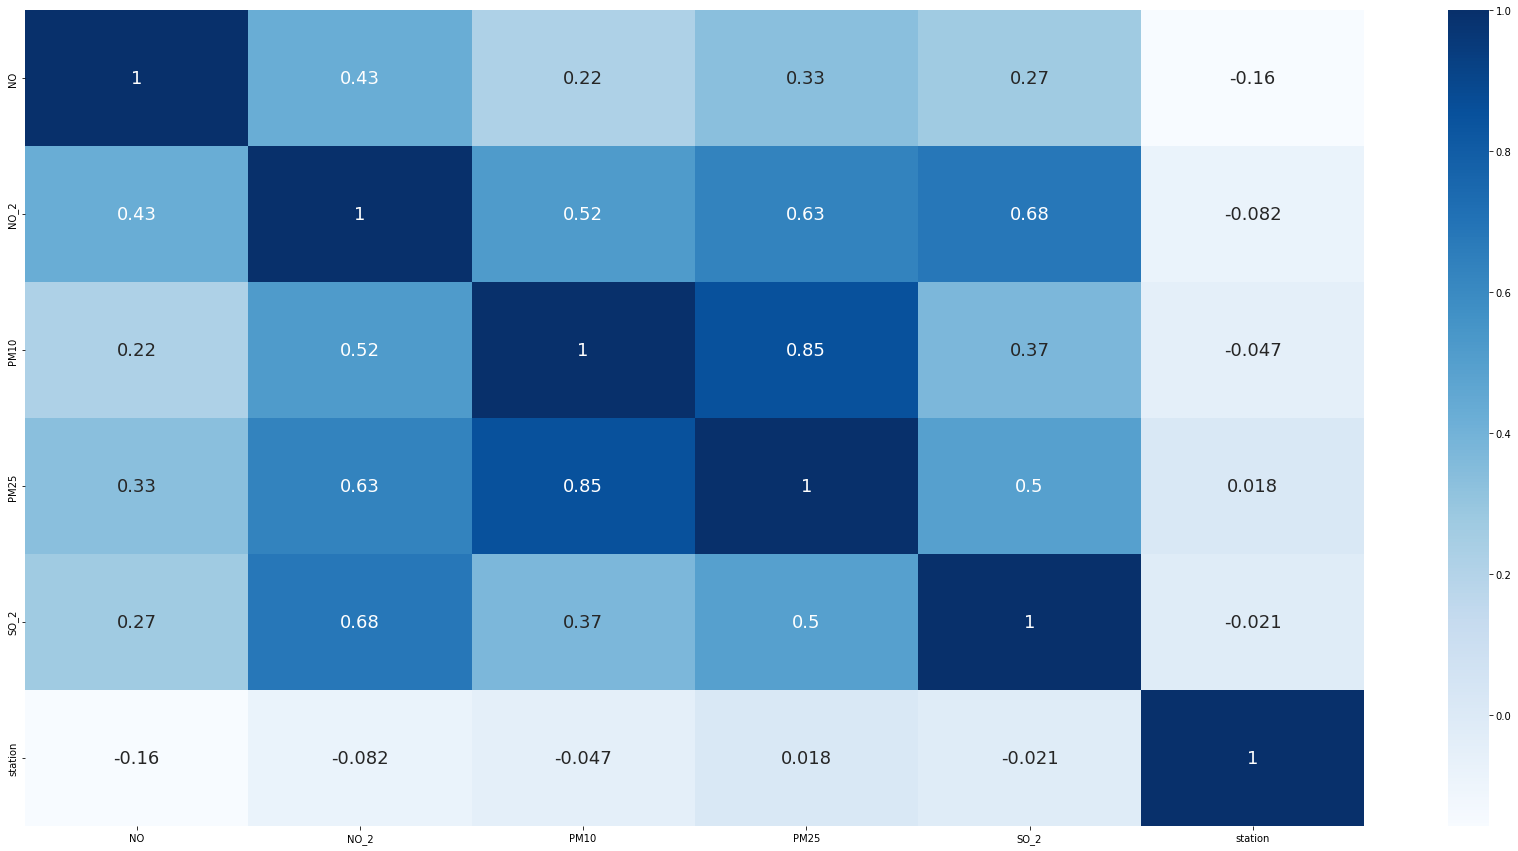

In [59]:
plt.figure(figsize=(30,15))

x = x.drop(['BEN', 'CO', 'EBE', 'NMHC', 'O_3', 'TCH', 'TOL'], axis=1)

plt.figure(figsize=(30,15))
ax = sns.heatmap(x.corr(),cmap="Blues",annot=True,annot_kws={"size": 18})

In [131]:
allMadrid.head()
allMadrid.info()
allMadrid.count()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64735 entries, 0 to 226391
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   PM10     64735 non-null  float64
 1   PM25     64735 non-null  float64
 2   Livello  64735 non-null  object 
dtypes: float64(2), object(1)
memory usage: 2.0+ MB


PM10       64735
PM25       64735
Livello    64735
dtype: int64

CLASSIFICAZIONE BINARIA

In [18]:
# Random state
rs = 42

# Split the data to check which algorithms learn better (later on we can check )
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=rs)
y_train = y_train.astype(int)
y_test = y_test.astype(int)

# look at the shape of the data (many problems can arise from wrong shape)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(110536, 1)
(27634, 1)
(110536, 1)
(27634, 1)


CLASSIFICATORI

In [19]:
# List of classifiers:
classifiers = [
    LogisticRegression(random_state = rs),
    DecisionTreeClassifier(random_state=rs),
    SVC(probability=True),
    RandomForestClassifier(n_estimators = 10, random_state=rs),
    GradientBoostingClassifier(random_state= rs),
    AdaBoostClassifier(n_estimators=10, random_state= rs),
    LinearDiscriminantAnalysis()
]

# List of results that will occure:
clf_name = [] # names of the classifiers
model_results = pd.DataFrame.copy(y_test) #resulting of prediction from the models

kfold = StratifiedKFold(n_splits=5) #cross-validation
cv_results = [] # scores from cross validation
cv_acc = [] # mean accuracy from cross validation, need to maximize
cv_std = [] # standard deviation from cross validation, need to minimise

cnfm = [] #confusion matrix
clr = [] #classification report
roc_auc = [] #roc curve:
roc_tpr = []
roc_fpr = []

ACCURATEZZA

In [20]:
# Training the algorithms and results
for clf in classifiers:
    name = clf.__class__.__name__
    clf_name.append(name)
    
    #fitting and predictions
    model = clf.fit(x_train, y_train.values.ravel())
    y_pred = model.predict(x_test)
    model_results[name] = y_pred
    
    #accuracy and log loss
    cv_results.append(cross_val_score(clf, x_train, y_train.values.ravel(), scoring = "accuracy",cv = kfold))
    acc = round(accuracy_score(y_test.values.ravel(), y_pred), 2) #need to maximize
    train_pred = clf.predict_proba(x_test)
    print(f'Accuracy: {acc} \t ---> {name} ')
    
    #confusion matrix, clasification report, roc curve
    cnfm.append(confusion_matrix(y_test.values.ravel(), y_pred))
    clr.append(classification_report(y_test.values.ravel(), y_pred))
    fpr, tpr, thresholds = roc_curve(y_pred, y_test.values.ravel(), pos_label=1)
    roc_auc.append(auc(fpr, tpr))
    roc_tpr.append(tpr)
    roc_fpr.append(fpr)
    

for i in cv_results:
    cv_acc.append(i.mean())
    cv_std.append(i.std())

Accuracy: 1.0 	 ---> LogisticRegression 
Accuracy: 1.0 	 ---> DecisionTreeClassifier 


KeyboardInterrupt: 

In [147]:
# Cross validation accuracy results graph
cv_res = pd.DataFrame({"CrossValMeans":cv_acc, "CrossValerrors": cv_std,"Algorithm":clf_name})

plt.figure(figsize=(12,6))
sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set2",orient = "h",**{'xerr':cv_std})
plt.xlabel("Mean Accuracy")
plt.title("Cross validation scores")

TypeError: barplot() got multiple values for argument 'data'

<Figure size 864x432 with 0 Axes>